In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
file = open("20230531_CVD_3076_60s_10x10pts_net_sums.txt", "r")

dat_si_d1 = np.zeros((10, 10))
dat_ga_d1 = np.zeros((10, 10))

dat_si_d2 = np.zeros((10, 10))
dat_ga_d2 = np.zeros((10, 10))

for i in range(0, 213):
    s = []
    for j in file.readline().split(" "):
        #purpose of this for block is to get rid of empty strings in the split() output
        if j != "":
            s.append(j)
    if s != []: #check if readline() read anything
        if s[0][0] == "2": #check if it's a line containing data
            x = int(s[0][-3]) #x is the slower changing index
            y = int(s[0][-1]) #y is the most rapidly changing index
            si_counts = int(s[1])
            ga_counts = int(s[6])
            if s[0][-5] == "1": #separate into detector 1 and detector 2
                dat_si_d1[x][y] = si_counts
                dat_ga_d1[x][y] = ga_counts
            elif s[0][-5] == "2":
                dat_si_d2[x][y] = si_counts
                dat_ga_d2[x][y] = ga_counts
        
file.close()

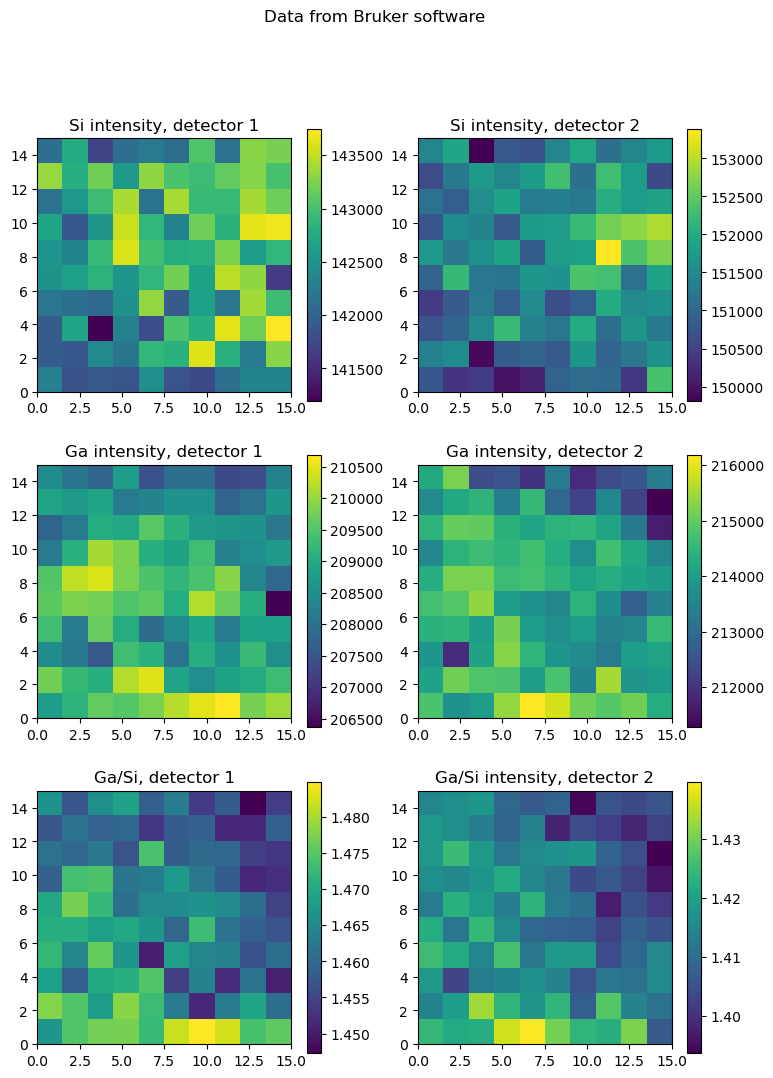

In [13]:
#si_max = max([dat_si_d1.max(), dat_si_d2.max()])
#si_min = min([dat_si_d1.min(), dat_si_d2.min()])

#ga_max = max([dat_ga_d1.max(), dat_ga_d2.max()])
#ga_min = min([dat_ga_d1.min(), dat_ga_d2.min()])

c="viridis"

fg, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(9, 12))

im1_pointer = ax1.imshow(dat_si_d1, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im1_pointer, ax=ax1)
ax1.set_title("Si intensity, detector 1")

im3_pointer = ax3.imshow(dat_ga_d1, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im3_pointer, ax=ax3)
ax3.set_title("Ga intensity, detector 1")

im5_pointer = ax5.imshow(dat_ga_d1/dat_si_d1, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im5_pointer, ax=ax5)
ax5.set_title("Ga/Si, detector 1")

im2_pointer = ax2.imshow(dat_si_d2, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im2_pointer, ax=ax2)
ax2.set_title("Si intensity, detector 2")

im4_pointer = ax4.imshow(dat_ga_d2, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im4_pointer, ax=ax4)
ax4.set_title("Ga intensity, detector 2")

im6_pointer = ax6.imshow(dat_ga_d2/dat_si_d2, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im6_pointer, ax=ax6)
ax6.set_title("Ga/Si intensity, detector 2")

fg.suptitle("Data from Bruker software")

plt.show()